In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/single-h5/t1.h5
/kaggle/input/final-nssc/feature_names.npz
/kaggle/input/final-nssc/jets_data_labels.npz


**We took 35 .h5 files from the "train_data" folder, and separated the tabular features, and merged 35 files and compressed them into a .npz file.**

In [3]:
# loading the data 
data = np.load("/kaggle/input/final-nssc/jets_data_labels.npz", allow_pickle=True)
X = data['jet_data']
y = data['target_labels']

features = np.load('/kaggle/input/final-nssc/feature_names.npz')
feature_names = features['feature_names']

# making a dataframe for better clarity
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y
df.head()

,j_ptfrac,j_pt,j_eta,j_mass,j_tau1_b1,j_tau2_b1,j_tau3_b1,j_tau1_b2,j_tau2_b2,j_tau3_b2,...,j_m2_b2_mmdt,j_n2_b1_mmdt,j_n2_b2_mmdt,j_mass_trim,j_mass_mmdt,j_mass_prun,j_mass_sdb2,j_mass_sdm1,j_multiplicity,target
0,1.0,1219.072510,0.191047,88.926659,39.675713,29.181877,23.024847,5.747612,2.836821,2.152825,...,0.083278,0.412136,0.299058,75.391823,8.926882,22.020262,76.720673,0.000000,75.0,b'j_g'
1,1.0,978.023376,1.293121,63.371983,15.819817,6.413140,5.314110,4.092102,0.307188,0.242978,...,0.036310,0.310217,0.226661,12.361094,3.886512,9.847269,63.371983,-0.000019,31.0,b'j_w'
2,1.0,945.422180,-0.026487,162.144669,150.766953,72.055489,20.798262,27.230459,14.819243,1.481726,...,0.079094,0.357559,0.289220,162.144669,162.144669,162.144669,162.144669,101.859085,61.0,b'j_t'
3,1.0,1014.131470,-0.879544,91.698196,77.425255,19.694454,15.398493,8.152174,1.165737,0.743062,...,0.033311,0.238871,0.094516,91.698196,91.258934,85.548714,91.258934,-0.000007,39.0,b'j_z'
4,1.0,1018.810303,-0.715098,82.479347,76.979645,10.214416,7.916916,6.578963,0.700449,0.545424,...,0.014450,0.141906,0.036665,79.725777,79.725777,78.275627,79.725777,-0.000004,35.0,b'j_w'


# Feature handling

**Separated image features from tabular features. "jets_data_labels.npz" contains the jets_data and target values. "feature_names.npz" contains the list of feature names**


In [5]:
# for this we'll work with a single .h5 file

# loading the data
import h5py
import pandas as pd
import numpy as np

with h5py.File("/kaggle/input/single-h5/t1.h5", "r") as f:

    X_single = np.array(f["jets_data"])
    y_single = np.array(f["target"])
    feature_names_single = np.array(f["FeatureNames"]).astype(str)

df_single = pd.DataFrame(X_single, columns=feature_names_single)
df_single["target"] = y_single

print(df.head())

   j_ptfrac         j_pt     j_eta      j_mass   j_tau1_b1  j_tau2_b1  \
0       1.0  1219.072510  0.191047   88.926659   39.675713  29.181877   
1       1.0   978.023376  1.293121   63.371983   15.819817   6.413140   
2       1.0   945.422180 -0.026487  162.144669  150.766953  72.055489   
3       1.0  1014.131470 -0.879544   91.698196   77.425255  19.694454   
4       1.0  1018.810303 -0.715098   82.479347   76.979645  10.214416   

   j_tau3_b1  j_tau1_b2  j_tau2_b2  j_tau3_b2  ...  j_m2_b2_mmdt  \
0  23.024847   5.747612   2.836821   2.152825  ...      0.083278   
1   5.314110   4.092102   0.307188   0.242978  ...      0.036310   
2  20.798262  27.230459  14.819243   1.481726  ...      0.079094   
3  15.398493   8.152174   1.165737   0.743062  ...      0.033311   
4   7.916916   6.578963   0.700449   0.545424  ...      0.014450   

   j_n2_b1_mmdt  j_n2_b2_mmdt  j_mass_trim  j_mass_mmdt  j_mass_prun  \
0      0.412136      0.299058    75.391823     8.926882    22.020262   
1      0

In [6]:
# identifying missing values in the dataset
df_single.isnull().sum() 
# as seen below, no missing value, so we don't need to apply any imputation strategies

j_ptfrac           0
j_pt               0
j_eta              0
j_mass             0
j_tau1_b1          0
j_tau2_b1          0
j_tau3_b1          0
j_tau1_b2          0
j_tau2_b2          0
j_tau3_b2          0
j_tau32_b1         0
j_tau32_b2         0
j_zlogz            0
j_c1_b0            0
j_c1_b1            0
j_c1_b2            0
j_c2_b1            0
j_c2_b2            0
j_d2_b1            0
j_d2_b2            0
j_d2_a1_b1         0
j_d2_a1_b2         0
j_m2_b1            0
j_m2_b2            0
j_n2_b1            0
j_n2_b2            0
j_tau1_b1_mmdt     0
j_tau2_b1_mmdt     0
j_tau3_b1_mmdt     0
j_tau1_b2_mmdt     0
j_tau2_b2_mmdt     0
j_tau3_b2_mmdt     0
j_tau32_b1_mmdt    0
j_tau32_b2_mmdt    0
j_c1_b0_mmdt       0
j_c1_b1_mmdt       0
j_c1_b2_mmdt       0
j_c2_b1_mmdt       0
j_c2_b2_mmdt       0
j_d2_b1_mmdt       0
j_d2_b2_mmdt       0
j_d2_a1_b1_mmdt    0
j_d2_a1_b2_mmdt    0
j_m2_b1_mmdt       0
j_m2_b2_mmdt       0
j_n2_b1_mmdt       0
j_n2_b2_mmdt       0
j_mass_trim  

# Performing PCA (Principal Component Analysis)

In [7]:
# scaling the data before applying PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_single,y_single,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# computing the eigenvalues and eigenvectors of the covariance matrix
# Covariance matrix
cov_matrix = np.cov(X_train_scaled, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n",eigenvalues)
print("Eigenvectors:\n",eigenvectors)

Eigenvalues:
 [ 2.30876008e+01+0.00000000e+00j  1.16910086e+01+0.00000000e+00j
  4.25738923e+00+0.00000000e+00j  2.30263156e+00+0.00000000e+00j
  1.88198274e+00+0.00000000e+00j  1.21719240e+00+0.00000000e+00j
  1.18902936e+00+0.00000000e+00j  1.00157122e+00+0.00000000e+00j
  9.61801389e-01+0.00000000e+00j  8.44683344e-01+0.00000000e+00j
  7.24773934e-01+0.00000000e+00j  4.84538370e-01+0.00000000e+00j
  3.71489022e-01+0.00000000e+00j  2.89662064e-01+0.00000000e+00j
  2.73966219e-01+0.00000000e+00j  2.16208058e-01+0.00000000e+00j
  1.68877174e-01+0.00000000e+00j  1.46163118e-01+0.00000000e+00j
  1.38255476e-01+0.00000000e+00j  1.14079659e-01+0.00000000e+00j
  9.91948452e-02+0.00000000e+00j  8.83614924e-02+0.00000000e+00j
  7.75765002e-02+0.00000000e+00j  5.83421222e-02+0.00000000e+00j
  4.66974657e-02+0.00000000e+00j  3.70315601e-02+0.00000000e+00j
  3.30460270e-02+0.00000000e+00j  3.27523294e-02+0.00000000e+00j
  2.55082787e-02+0.00000000e+00j  2.26481985e-02+0.00000000e+00j
  1.8593540

In [8]:
# reporting the explained variance ratio
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

top_k = 5  # top 5 components
top_explained_variance_ratio = explained_variance_ratio[:top_k]

print(f"Explained variance ratio for top {top_k} components:")
for i, ratio in enumerate(top_explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")

Explained variance ratio for top 5 components:
PC1: 0.4439
PC2: 0.2248
PC3: 0.0819
PC4: 0.0443
PC5: 0.0362


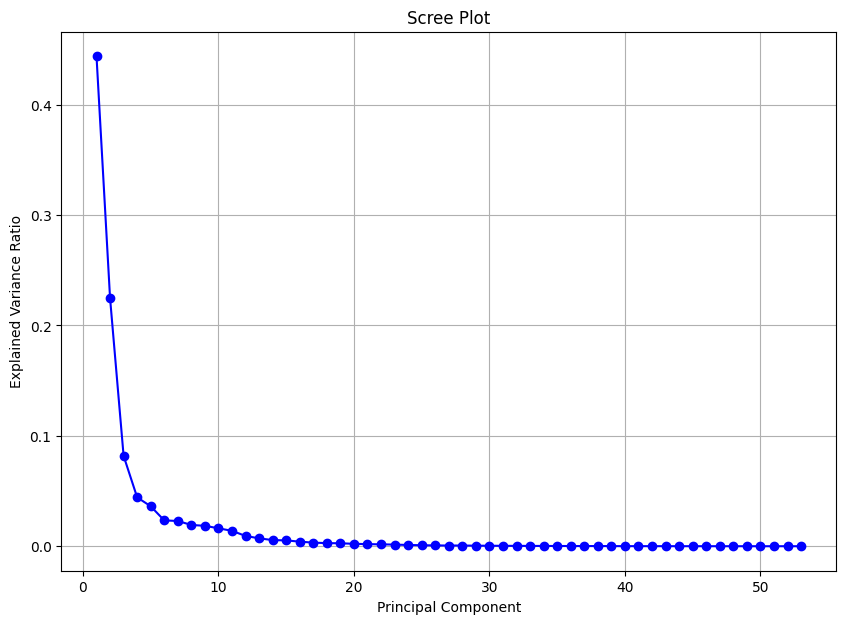

In [9]:
# plotting a scree plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(
    np.arange(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    linestyle='-',
    color='b'
)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Dataset Summary

In [10]:
# summarising the dataset
# in one .h5 file, there are 10000 records, and 53 features
print(X_single.shape)
print(feature_names.shape)

# there are 5 classes
print(df_single['target'].unique())

(10000, 53)
(53,)
[b'j_t' b'j_w' b'j_g' b'j_z' b'j_q']


In [11]:
# printing the dataset summary
df_single.describe().T

,count,mean,std,min,25%,50%,75%,max
j_ptfrac,10000.0,1.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
j_pt,10000.0,1046.247305,118.823532,4.303768e+02,997.087738,1022.498016,1068.262329,2522.539307
j_eta,10000.0,-0.014254,0.761733,-2.251608e+00,-0.559124,-0.025174,0.539703,2.405969
j_mass,10000.0,93.476177,42.748400,7.892519e+00,70.039698,86.675838,104.755348,345.462708
j_tau1_b1,10000.0,62.196011,41.789690,3.015884e+00,30.971230,55.653595,79.483751,277.147491
j_tau2_b1,10000.0,24.614815,19.274730,2.055840e+00,11.528912,17.975042,30.640898,166.579163
j_tau3_b1,10000.0,15.935314,9.799289,1.243688e+00,9.226073,13.346023,19.939654,114.705582
j_tau1_b2,10000.0,9.576107,9.057522,5.545421e-02,4.062794,6.640483,9.648044,63.292397
j_tau2_b2,10000.0,2.601970,3.287444,4.347774e-02,0.654993,1.290509,2.908554,32.052773
j_tau3_b2,10000.0,1.158583,1.145153,1.856087e-02,0.448174,0.787982,1.440455,15.100065


In [13]:
import seaborn as sns
# functions to print dataset summary and important visualizations
def data_summary(df):
    """Prints overall data info and saves missing/empty summary"""
    print("=== [DATA SUMMARY] ===")
    print(f"Shape: {df.shape}")
    print("\nColumn Types:\n", df.dtypes.value_counts())

    # Count NaN and empty strings
    nan_counts = df.isna().sum()
    empty_counts = (df == "").sum()
    total_missing = nan_counts + empty_counts
    total_rows = len(df)

    summary = pd.DataFrame({
        "NaN Count": nan_counts,
        "Empty String Count": empty_counts,
        "Total Missing": total_missing,
        "Missing %": (total_missing / total_rows * 100).round(2)
    }).sort_values("Total Missing", ascending=False)

    print("\n=== Missing / Empty Summary (Top 20 Columns) ===")
    print(summary.head(20))

def detect_feature_types(df, target_col):
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()

    # Treat low-unique numeric features as categorical
    num_as_cat = [c for c in numeric if df[c].nunique() < 20]
    categorical = list(set(object_cols + num_as_cat) - set([target_col]))
    numeric = [c for c in numeric if c not in num_as_cat and c != target_col]
    return numeric, categorical, datetime_cols

# visualizations

def plot_target_distribution(df, target_col):
    """Plots class distribution"""
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_col, data=df, palette='Set2')
    plt.title("Target Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

    print("\nClass Distribution (%):")
    print(df[target_col].value_counts(normalize=True) * 100)


def numeric_distributions(df, numeric_cols):
    """Plot distributions of numeric features"""
    for col in numeric_cols[:8]:  # limit to first few for readability
        plt.figure(figsize=(6,4))
        try:
            sns.histplot(df[col].dropna(), kde=True, color='steelblue')
        except:
            sns.histplot(df[col].dropna(), kde=False, color='steelblue')
        plt.title(f"Distribution of {col}")
        plt.show()
def classwise_distributions(df, numeric_cols, target_col):
    """Plots feature distributions across classes"""
    for col in numeric_cols[:6]:
        plt.figure(figsize=(6,4))
        try:
            sns.histplot(data=df, x=col, hue=target_col, element='step', stat='density', kde=True)
        except:
            sns.histplot(data=df, x=col, hue=target_col, element='step', stat='density', kde=False)
        plt.title(f"{col} by {target_col}")
        plt.show()
        
def correlation_analysis(df, numeric_cols, target_col):
    """Plots correlation matrix & feature-target correlation"""
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    mask = np.tril(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr,mask=mask,cmap="coolwarm", center=0)
    #sns.heatmap(corr,mask= mask, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix (Numeric Features)")
    plt.show()

    # Correlation with target (encoded)
    enc_target = df[target_col].astype('category').cat.codes
    corr_with_target = df[numeric_cols].corrwith(enc_target).abs().sort_values(ascending=False)
    print("\nTop correlated features with target:")
    display(corr_with_target.head(10))

    plt.figure(figsize=(6,5))
    sns.barplot(x=corr_with_target.values[:15], y=corr_with_target.index[:15], palette='viridis')
    plt.title("Feature Correlation with Encoded Target")
    plt.xlabel("Correlation Coefficient")
    plt.show()


def run_eda(df, target_col):
    print(f" Running EDA for target column: '{target_col}'")
    data_summary(df)

    numeric_cols, categorical_cols, datetime_cols = detect_feature_types(df, target_col)
    print(f"\nDetected numeric: {len(numeric_cols)}, categorical: {len(categorical_cols)}, datetime: {len(datetime_cols)}")

    plot_target_distribution(df, target_col)
    numeric_distributions(df, numeric_cols)
    classwise_distributions(df, numeric_cols, target_col)
    correlation_analysis(df, numeric_cols, target_col)

    print(df.head())

In [14]:
import warnings
warnings.filterwarnings('ignore')

 Running EDA for target column: 'target'
=== [DATA SUMMARY] ===
Shape: (10000, 54)

Column Types:
 float64    53
object      1
Name: count, dtype: int64

=== Missing / Empty Summary (Top 20 Columns) ===
            NaN Count  Empty String Count  Total Missing  Missing %
j_ptfrac            0                   0              0        0.0
j_pt                0                   0              0        0.0
j_eta               0                   0              0        0.0
j_mass              0                   0              0        0.0
j_tau1_b1           0                   0              0        0.0
j_tau2_b1           0                   0              0        0.0
j_tau3_b1           0                   0              0        0.0
j_tau1_b2           0                   0              0        0.0
j_tau2_b2           0                   0              0        0.0
j_tau3_b2           0                   0              0        0.0
j_tau32_b1          0                   0        

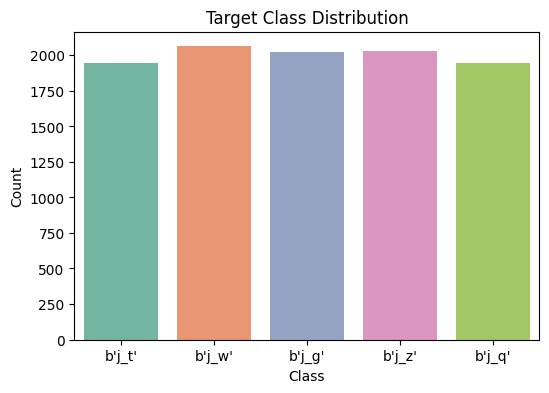


Class Distribution (%):
target
b'j_w'    20.63
b'j_z'    20.29
b'j_g'    20.21
b'j_t'    19.44
b'j_q'    19.43
Name: proportion, dtype: float64


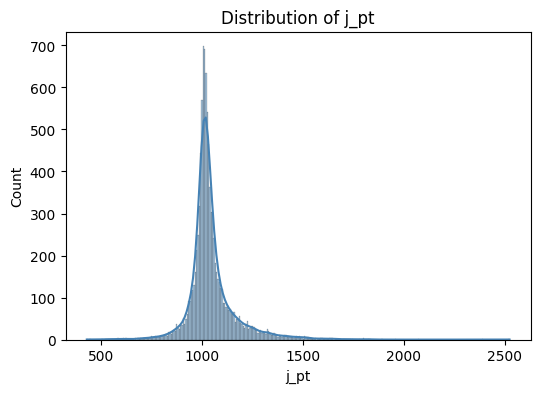

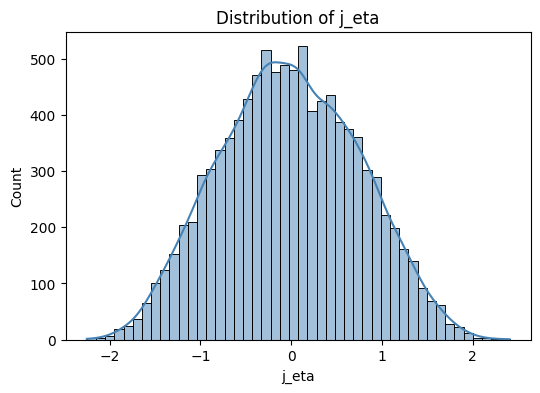

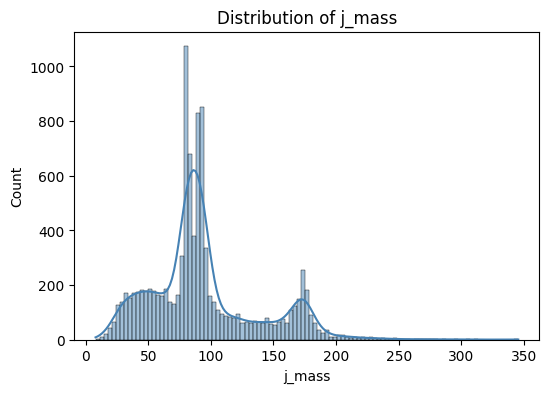

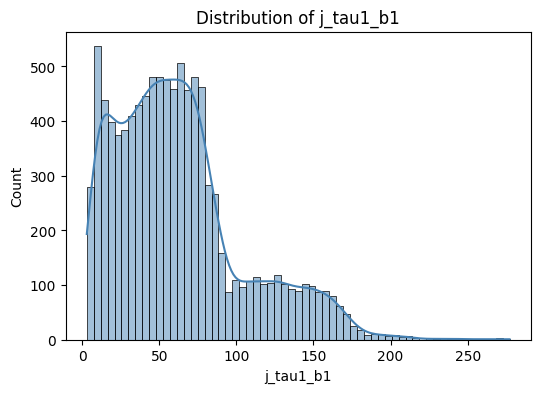

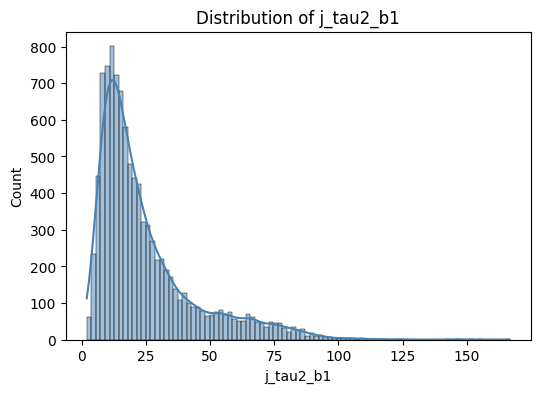

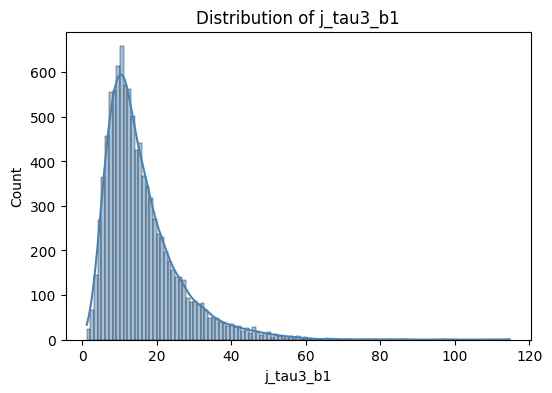

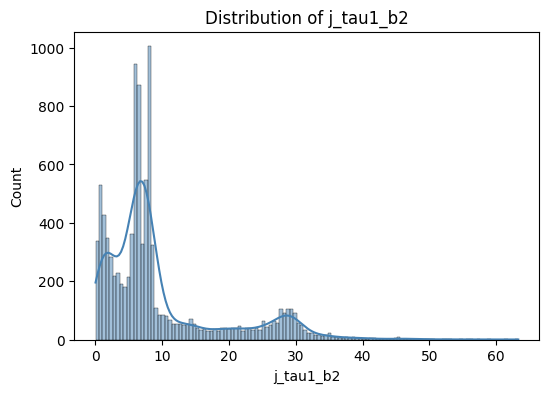

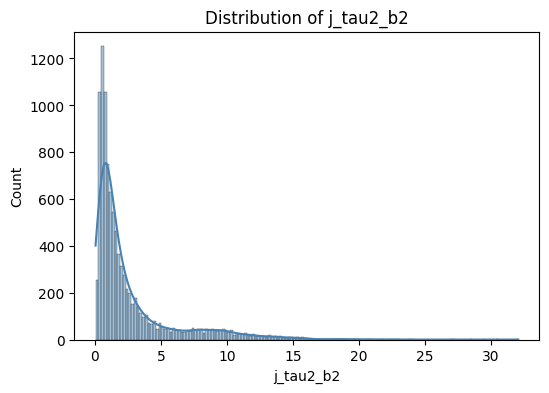

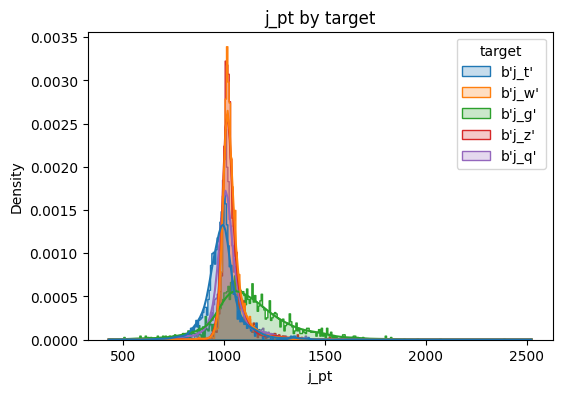

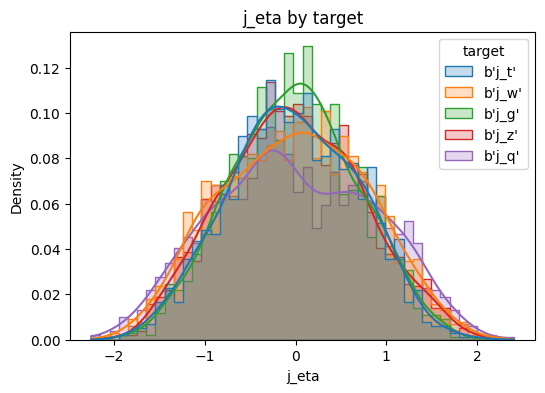

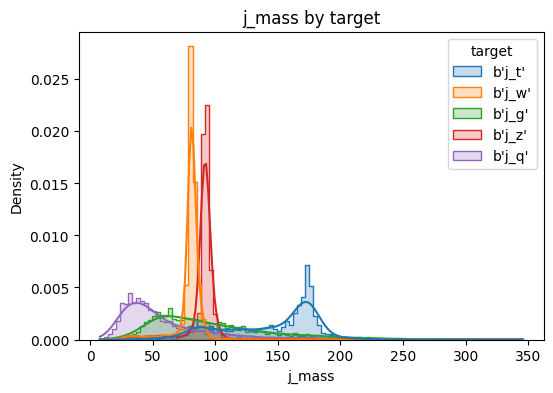

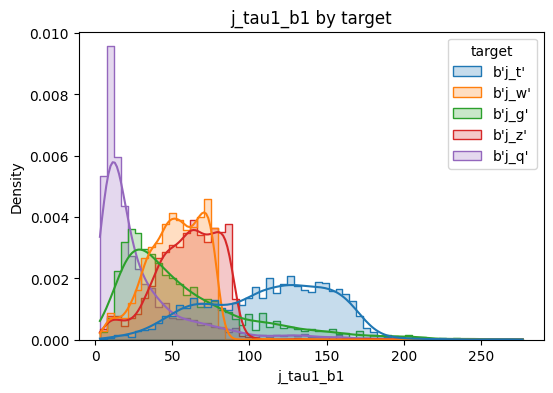

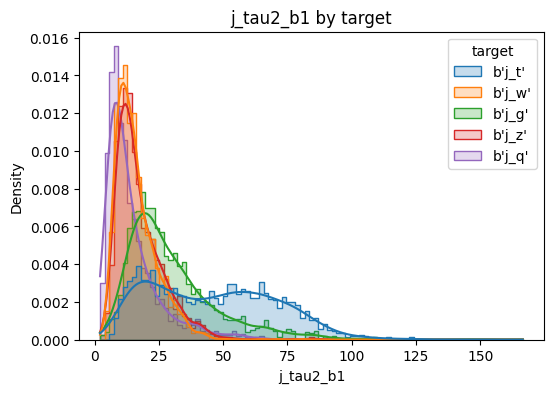

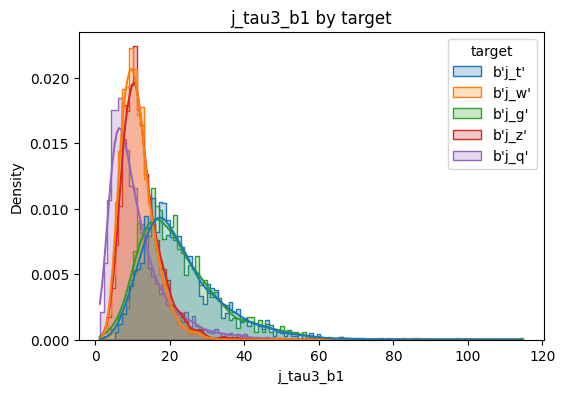

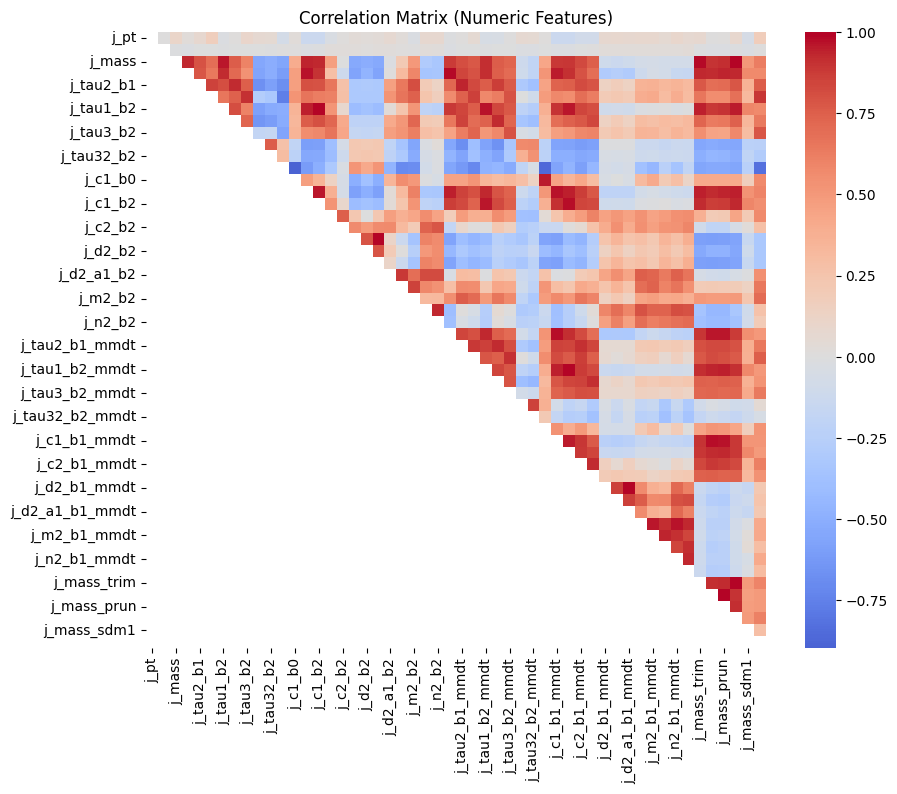


Top correlated features with target:


j_n2_b2            0.604226
j_n2_b1            0.589844
j_c2_b2            0.551039
j_d2_a1_b2         0.530452
j_d2_a1_b2_mmdt    0.474938
j_n2_b1_mmdt       0.467302
j_n2_b2_mmdt       0.465718
j_m2_b1_mmdt       0.435264
j_d2_b2_mmdt       0.430736
j_m2_b2_mmdt       0.422027
dtype: float64

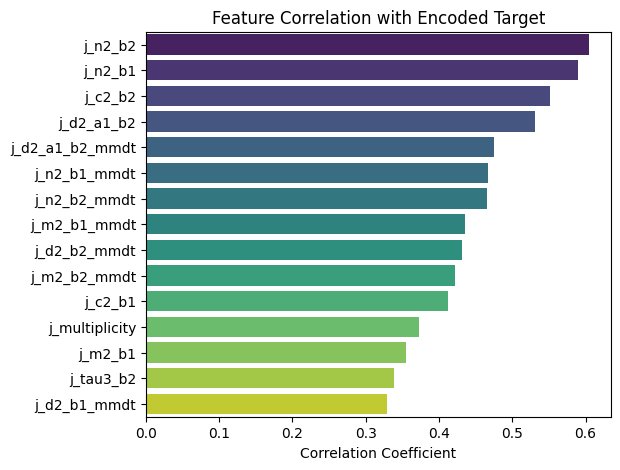

   j_ptfrac         j_pt     j_eta      j_mass   j_tau1_b1  j_tau2_b1  \
0       1.0  1004.697510  0.481923  168.492035  123.345245  65.890678   
1       1.0  1017.162415  0.682768   82.013718   45.497135  19.577923   
2       1.0  1006.376587  0.106710  165.805313  147.729111  59.257404   
3       1.0  1003.218018  0.640991   83.154671   78.780273   9.236208   
4       1.0  1215.296021 -1.371365  123.863472   49.496937  18.929634   

   j_tau3_b1  j_tau1_b2  j_tau2_b2  j_tau3_b2  ...  j_m2_b2_mmdt  \
0  26.113770  27.824972   9.900654   2.366408  ...      0.062845   
1  13.780347   6.324104   1.348406   0.932917  ...      0.031428   
2  30.404633  24.493736   8.566990   3.784771  ...      0.071348   
3   7.099198   6.363686   0.313145   0.231414  ...      0.011813   
4  15.176288  11.672941   2.241098   1.544776  ...      0.070686   

   j_n2_b1_mmdt  j_n2_b2_mmdt  j_mass_trim  j_mass_mmdt  j_mass_prun  \
0      0.321886      0.179565   168.492035   168.492035   159.223923   
1      0

In [15]:
run_eda(df_single, target_col = 'target')

# Model development -- (on tabular features)
**for this we have taken 35 .h5 files, all merged into "jets_data_labels".npz**

In [12]:
# label encoding the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)
df.drop('target', axis=1, inplace=True)
y = df['target_encoded']

Label Mapping: {b'j_g': 0, b'j_q': 1, b'j_t': 2, b'j_w': 3, b'j_z': 4}


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

In [21]:
# best model 
# version 6 - slight changes like leaky relu, one more layer added


from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, input_shape=(53,), kernel_regularizer=regularizers.l2(1e-5)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.15),
    
    Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.15),
    
    Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),

    Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.1),

    Dense(32, kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    
    Dense(5, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2025-10-16 09:02:14.185300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760605334.391209      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760605334.448266      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1760605346.152430      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760605346.153110      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,957 (492.02 KB)

 Trainable params: 124,485 (486.27 KB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=150,
    batch_size=32,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)


Epoch 1/150


I0000 00:00:1760605383.362631     107 service.cc:148] XLA service 0x7eacb00094f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760605383.363206     107 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760605383.363226     107 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760605383.853333     107 cuda_dnn.cc:529] Loaded cuDNN version 90300


  58/8750 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.4187 - loss: 1.4472  

I0000 00:00:1760605387.352201     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8750/8750 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7363 - loss: 0.7950 - val_accuracy: 0.8104 - val_loss: 0.6013 - learning_rate: 0.0010
Epoch 2/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7839 - loss: 0.6661 - val_accuracy: 0.8143 - val_loss: 0.5847 - learning_rate: 0.0010
Epoch 3/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7889 - loss: 0.6526 - val_accuracy: 0.8179 - val_loss: 0.5742 - learning_rate: 0.0010
Epoch 4/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7910 - loss: 0.6471 - val_accuracy: 0.8150 - val_loss: 0.5818 - learning_rate: 0.0010
Epoch 5/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7939 - loss: 0.6362 - val_accuracy: 0.8175 - val_loss: 0.5708 - learning_rate: 0.0010
Epoch 6/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7958 - loss: 0.6318 - val_accuracy: 0.8184 - val_loss: 0.5692 - learning_rate: 0.0010
Epoch 7/150
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7972 -

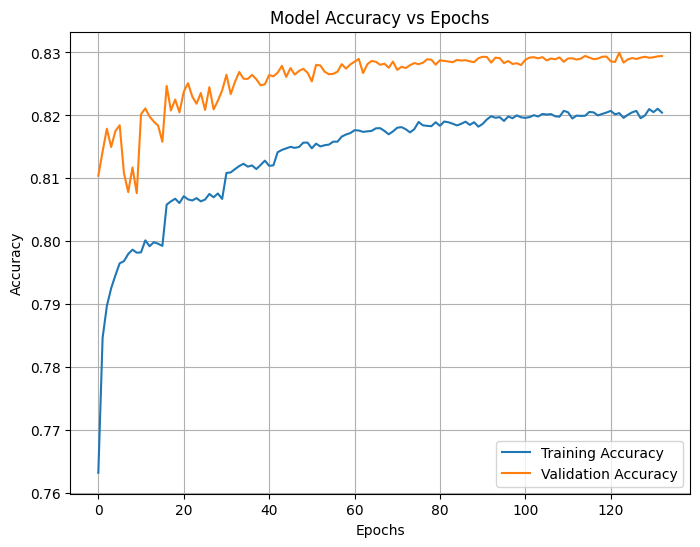

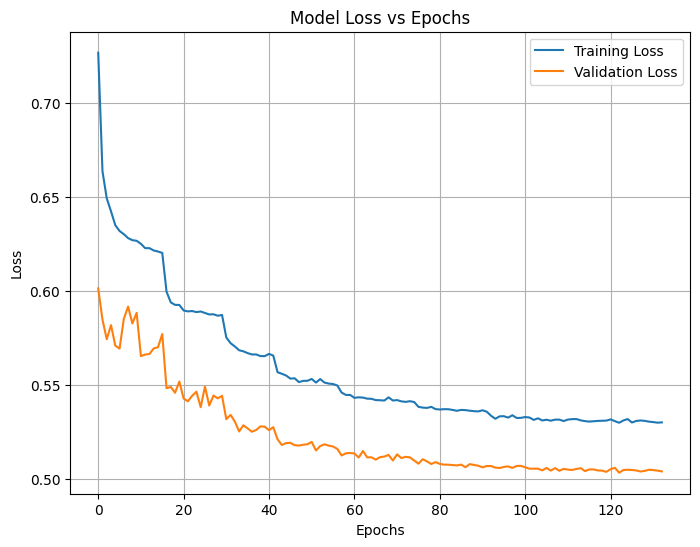

In [24]:
import matplotlib.pyplot as plt

# ================================
# Plot training & validation accuracy
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ================================
# Plot training & validation loss
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# MLP performance with scaling
y_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)

# performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

#ROC-AUC 
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

# final results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy:  0.8300
Precision: 0.8304
Recall:    0.8294
F1-score:  0.8297
ROC AUC:   0.9661

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     14202
           1       0.73      0.75      0.74     13548
           2       0.85      0.86      0.85     13955
           3       0.87      0.89      0.88     14243
           4       0.91      0.86      0.89     14052

    accuracy                           0.83     70000
   macro avg       0.83      0.83      0.83     70000
weighted avg       0.83      0.83      0.83     70000

Confusion Matrix:
 [[11145  1554  1056   209   238]
 [ 1537 10205   781   585   440]
 [  819   371 11989   490   286]
 [  218   985   159 12622   259]
 [  252   919   166   579 12136]]


In [26]:

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(53,), kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    
    Dense(5, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# This is our best MLP model, with the best AUC score

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,493 (466.77 KB)

 Trainable params: 118,149 (461.52 KB)

 Non-trainable params: 1,344 (5.25 KB)

In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=256,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)


Epoch 1/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7451 - loss: 0.7861 - val_accuracy: 0.8169 - val_loss: 0.5828 - learning_rate: 0.0010
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8084 - loss: 0.6052 - val_accuracy: 0.8223 - val_loss: 0.5575 - learning_rate: 0.0010
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8096 - loss: 0.5878 - val_accuracy: 0.8208 - val_loss: 0.5535 - learning_rate: 0.0010
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8134 - loss: 0.5741 - val_accuracy: 0.8227 - val_loss: 0.5424 - learning_rate: 0.0010
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8153 - loss: 0.5630 - val_accuracy: 0.8234 - val_loss: 0.5373 - learning_rate: 0.0010
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8159 - loss: 0.5601 - val_accuracy: 0.8230 - val_loss: 0.5369 - learning_rate: 0.0010
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.

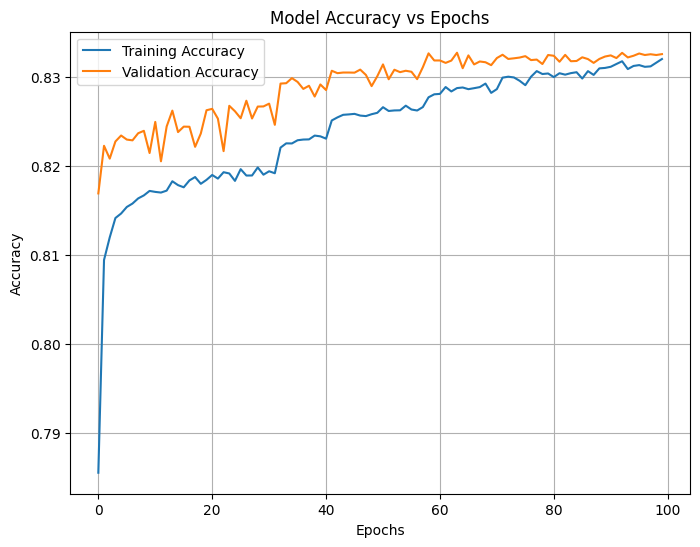

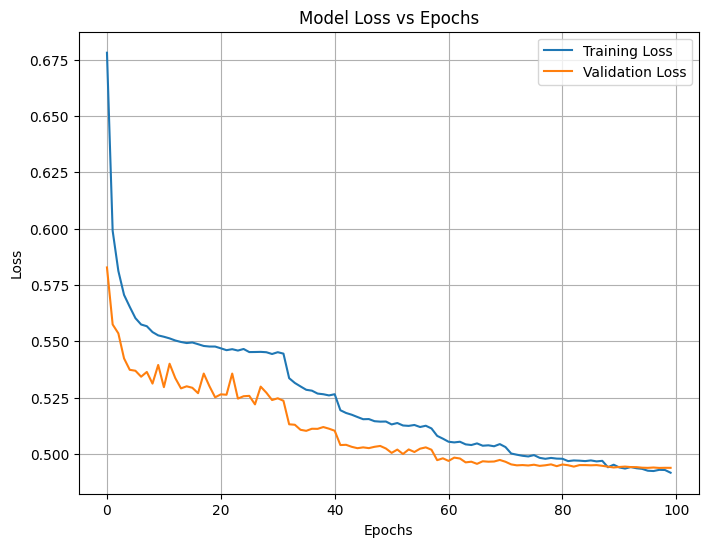

In [29]:
import matplotlib.pyplot as plt

# ================================
# Plot training & validation accuracy
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ================================
# Plot training & validation loss
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
y_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)

# performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

#ROC-AUC 
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

# final results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Accuracy:  0.8326
Precision: 0.8338
Recall:    0.8320
F1-score:  0.8326
ROC AUC:   0.9671

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79     14202
           1       0.73      0.75      0.74     13548
           2       0.85      0.87      0.86     13955
           3       0.88      0.88      0.88     14243
           4       0.92      0.86      0.89     14052

    accuracy                           0.83     70000
   macro avg       0.83      0.83      0.83     70000
weighted avg       0.83      0.83      0.83     70000

Confusion Matrix:
 [[11340  1458  1026   187   191]
 [ 1649 10221   804   521   353]
 [  861   344 12090   441   219]
 [  234  1020   191 12578   220]
 [  289   938   189   586 12050]]


In [16]:
# running my best model on PCA reduced dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [23]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(256, activation='relu', input_shape=(18,), kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    
    Dense(5, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    epochs=100,
    batch_size=256,
    callbacks=[lr_scheduler, early_stop],
    verbose=1
)


Epoch 1/100


I0000 00:00:1760615590.553910     104 service.cc:148] XLA service 0x7954d800b010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760615590.554436     104 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760615590.554456     104 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760615591.070711     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


  53/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5205 - loss: 1.2709

I0000 00:00:1760615594.534183     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7370 - loss: 0.7880 - val_accuracy: 0.8134 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8026 - loss: 0.6136 - val_accuracy: 0.8139 - val_loss: 0.5704 - learning_rate: 0.0010
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8080 - loss: 0.5914 - val_accuracy: 0.8188 - val_loss: 0.5556 - learning_rate: 0.0010
Epoch 4/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8093 - loss: 0.5800 - val_accuracy: 0.8170 - val_loss: 0.5536 - learning_rate: 0.0010
Epoch 5/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8102 - loss: 0.5736 - val_accuracy: 0.8200 - val_loss: 0.5455 - learning_rate: 0.0010
Epoch 6/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8107 - loss: 0.5696 - val_accuracy: 0.8181 - val_loss: 0.5469 - learning_rate: 0.0010
Epoch 7/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8120 - loss:

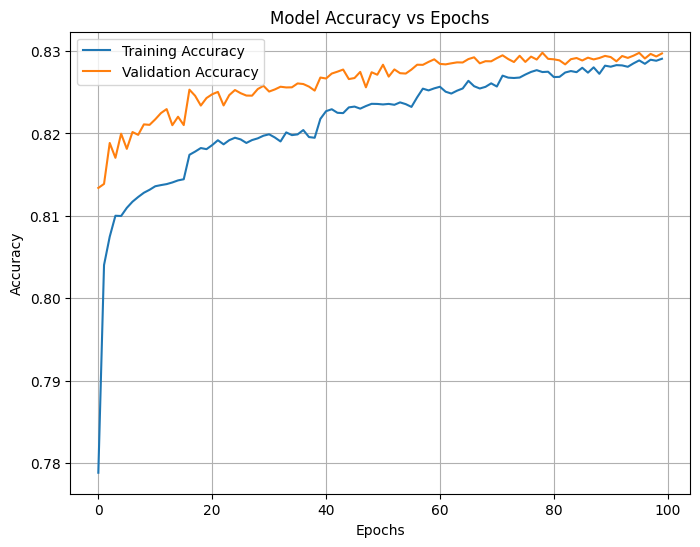

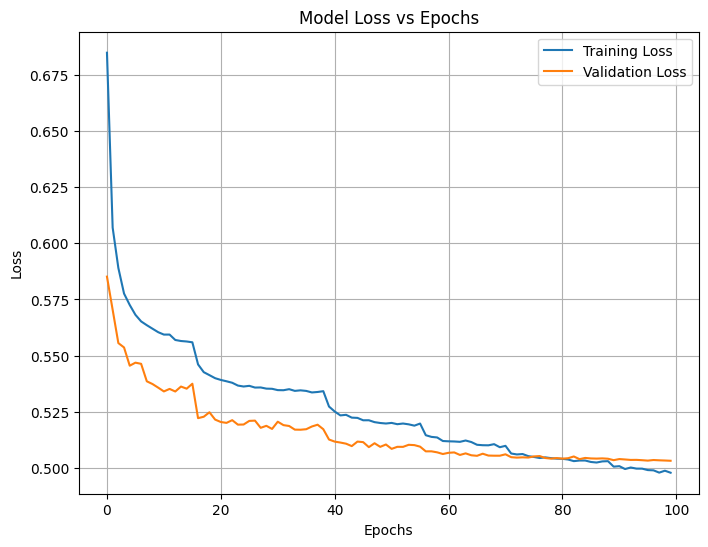

In [25]:
import matplotlib.pyplot as plt

# ================================
# Plot training & validation accuracy
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ================================
# Plot training & validation loss
# ================================
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# MLP performance with scaling
y_proba = model.predict(X_test_pca)
y_pred = np.argmax(y_proba, axis=1)

# performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

#ROC-AUC 
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

# final results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy:  0.8297
Precision: 0.8312
Recall:    0.8291
F1-score:  0.8298
ROC AUC:   0.9658

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     14202
           1       0.72      0.75      0.74     13548
           2       0.85      0.86      0.85     13955
           3       0.88      0.88      0.88     14243
           4       0.92      0.86      0.89     14052

    accuracy                           0.83     70000
   macro avg       0.83      0.83      0.83     70000
weighted avg       0.83      0.83      0.83     70000

Confusion Matrix:
 [[11367  1477   990   195   173]
 [ 1707 10162   785   530   364]
 [  892   367 12019   429   248]
 [  241  1055   207 12513   227]
 [  324   956   174   579 12019]]
